In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("gas_turbines.csv")

In [3]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
df.shape

(15039, 11)

In [5]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [8]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


<AxesSubplot:>

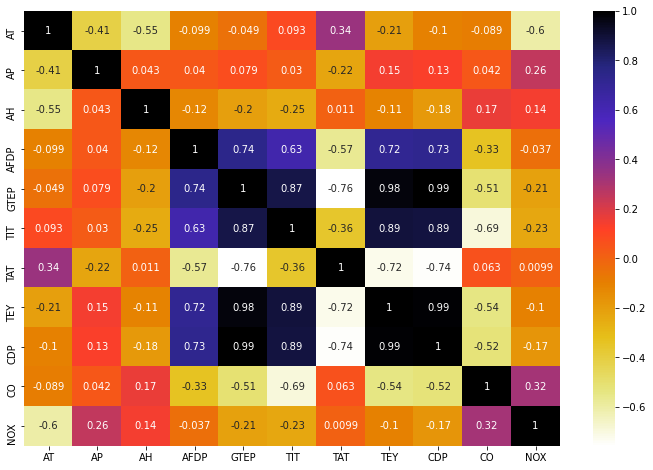

In [9]:
## Find the high correlated Values
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap= plt.cm.CMRmap_r)

In [10]:
## find the feature engineering correlation
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
         for j in range(i):
                if (corr_matrix.iloc[i,j])>threshold:
                    colname = corr_matrix.columns[i]
                    col_corr.add(colname)
    return col_corr

In [11]:
corr = correlation(df, 0.7)
print(f'name or High correlated Values is: {corr}\n total number of correlated is: {len(corr)}')

name or High correlated Values is: {'GTEP', 'CDP', 'TIT', 'TEY'}
 total number of correlated is: 4


In [12]:
#df.drop(columns=['CDP', 'TIT', 'GTEP'], axis=1, inplace=True)

In [13]:
df.shape

(15039, 11)

## Visualization

<AxesSubplot:xlabel='TEY', ylabel='AP'>

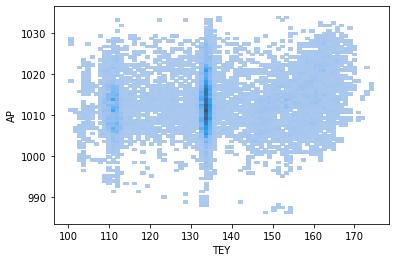

In [14]:
sns.histplot(x='TEY', y='AP',data=df)

<AxesSubplot:xlabel='TEY', ylabel='AP'>

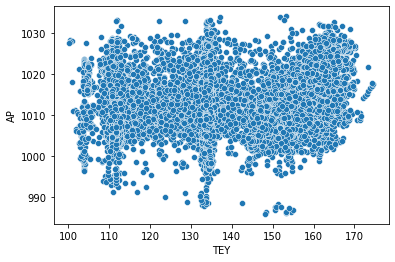

In [15]:
sns.scatterplot(x='TEY', y='AP',data=df)

<AxesSubplot:>

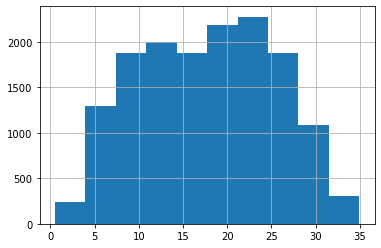

In [16]:
df.AT.hist()

<AxesSubplot:>

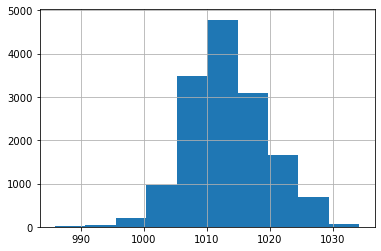

In [17]:
df.AP.hist()

<AxesSubplot:>

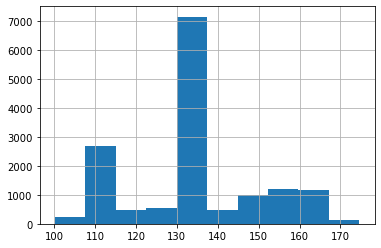

In [18]:
df.TEY.hist()

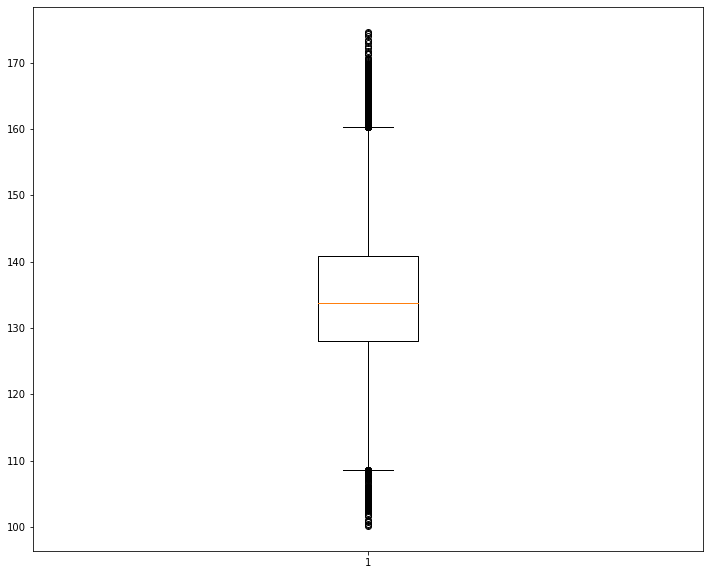

In [19]:
plt.figure(figsize=(12,10))
plt.boxplot(df.TEY)
plt.show()

In [20]:
train = df.drop('TEY', axis=1)
test = df.TEY

In [21]:
#calculating VIF for multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [22]:
X = df.drop('TEY',axis=1)
calc_vif(X)

,variables,VIF
0,AT,3.414439e+01
1,AP,1.842147e+04
2,AH,6.863745e+01
3,AFDP,8.580114e+01
4,GTEP,1.233878e+04
5,TIT,1.372092e+06
6,TAT,8.166382e+05
7,CDP,3.858125e+04
8,CO,3.813210e+00
9,NOX,1.071006e+02


## Standardize the data

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
df1 = scaler.fit_transform(train)

In [26]:
## split the DAtas
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state = 0)

In [28]:
print(f'{X_train.shape}  {X_test.shape}  {y_train.shape}  {y_test.shape}')

(10527, 10)  (4512, 10)  (10527,)  (4512,)


## build the keras model

In [29]:
## build the keras model
from keras import Sequential
from keras.layers import Dense

In [30]:
keras_model = Sequential()

In [31]:
#keras_model.add(Dense(1, activation = 'sigmoid'))

model = Sequential([
    Dense(12, activation='relu', input_shape=(10,)),
    Dense(8, activation='relu'),
    Dense(1, activation='linear'),
])

In [32]:
## compling the model
#keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#keras_model.compile(loss = 'binary_crossentropy', optimizer = "rmsprop", metrics = ['accuracy'])

keras_model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
#keras_model.fit(X_train, y_train, batch_size = 32, epochs = 100)
#keras_model.fit(X_train, y_train, epochs=150, batch_size=10)
#keras_model.fit(X_train, y_train, validation_data=(X_train.to_numpy(), y_train.to_numpy()), epochs=10, batch_size=64)


hist = keras_model.fit(np.array(X_train),np.array(y_train), batch_size=12, epochs=100,validation_data=(X_test, y_test))

Epoch 1/100
878/878 [==============================] - 3s 4ms/step - loss: -1971.5708 - accuracy: 0.0000e+00 - val_loss: -1983.8442 - val_accuracy: 0.0000e+00
Epoch 2/100
878/878 [==============================] - 2s 2ms/step - loss: -1967.6382 - accuracy: 0.0000e+00 - val_loss: -1983.8442 - val_accuracy: 0.0000e+00
Epoch 3/100
878/878 [==============================] - 2s 2ms/step - loss: -1964.0952 - accuracy: 0.0000e+00 - val_loss: -1983.8442 - val_accuracy: 0.0000e+00
Epoch 4/100
878/878 [==============================] - 2s 2ms/step - loss: -1964.2197 - accuracy: 0.0000e+00 - val_loss: -1983.8442 - val_accuracy: 0.0000e+00
Epoch 5/100
878/878 [==============================] - 2s 2ms/step - loss: -1966.9152 - accuracy: 0.0000e+00 - val_loss: -1983.8442 - val_accuracy: 0.0000e+00
Epoch 6/100
878/878 [==============================] - 2s 2ms/step - loss: -1964.7848 - accuracy: 0.0000e+00 - val_loss: -1983.8442 - val_accuracy: 0.0000e+00
Epoch 7/100
878/878 [=========================

878/878 [==============================] - 2s 2ms/step - loss: -1965.6085 - accuracy: 0.0000e+00 - val_loss: -1983.8442 - val_accuracy: 0.0000e+00
Epoch 53/100
878/878 [==============================] - 2s 2ms/step - loss: -1964.8920 - accuracy: 0.0000e+00 - val_loss: -1983.8442 - val_accuracy: 0.0000e+00
Epoch 54/100
878/878 [==============================] - 2s 2ms/step - loss: -1964.8207 - accuracy: 0.0000e+00 - val_loss: -1983.8442 - val_accuracy: 0.0000e+00
Epoch 55/100
878/878 [==============================] - 2s 2ms/step - loss: -1964.8451 - accuracy: 0.0000e+00 - val_loss: -1983.8442 - val_accuracy: 0.0000e+00
Epoch 56/100
878/878 [==============================] - 2s 2ms/step - loss: -1967.7414 - accuracy: 0.0000e+00 - val_loss: -1983.8442 - val_accuracy: 0.0000e+00
Epoch 57/100
878/878 [==============================] - 2s 2ms/step - loss: -1966.2136 - accuracy: 0.0000e+00 - val_loss: -1983.8442 - val_accuracy: 0.0000e+00
Epoch 58/100
878/878 [==============================]

In [34]:
keras_model.evaluate(X_test, y_test)[1]

141/141 [==============================] - 0s 2ms/step - loss: -1983.8440 - accuracy: 0.0000e+00


0.0

## As we are getting 0.0 accuracy we will build a diff model using different loss function and different optimizer.

## building another new model

In [35]:
keras_model2 = Sequential([
    Dense(16, activation='relu', input_shape=(10,)),
    Dense(12, activation='relu'),
    Dense(1, activation='linear'),
])

In [36]:
keras_model2.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mse'])

In [37]:
hist_2 = keras_model2.fit(np.array(X_train),np.array(y_train),
          batch_size=12, epochs=100,
          validation_data=(X_test, y_test))

Epoch 1/100
878/878 [==============================] - 3s 3ms/step - loss: 14671.4593 - mse: 14671.4593 - val_loss: 137.4188 - val_mse: 137.4188
Epoch 2/100
878/878 [==============================] - 2s 2ms/step - loss: 129.8031 - mse: 129.8031 - val_loss: 99.8372 - val_mse: 99.8372
Epoch 3/100
878/878 [==============================] - 2s 2ms/step - loss: 90.5327 - mse: 90.5327 - val_loss: 55.5267 - val_mse: 55.5267
Epoch 4/100
878/878 [==============================] - 2s 2ms/step - loss: 44.0377 - mse: 44.0377 - val_loss: 21.7491 - val_mse: 21.7491
Epoch 5/100
878/878 [==============================] - 2s 2ms/step - loss: 15.1619 - mse: 15.1619 - val_loss: 9.3460 - val_mse: 9.3460
Epoch 6/100
878/878 [==============================] - 2s 2ms/step - loss: 8.3090 - mse: 8.3090 - val_loss: 6.8189 - val_mse: 6.8189
Epoch 7/100
878/878 [==============================] - 2s 2ms/step - loss: 6.0047 - mse: 6.0047 - val_loss: 8.4916 - val_mse: 8.4916
Epoch 8/100
878/878 [====================

Epoch 62/100
878/878 [==============================] - 2s 2ms/step - loss: 1.3639 - mse: 1.3639 - val_loss: 5.0337 - val_mse: 5.0337
Epoch 63/100
878/878 [==============================] - 2s 2ms/step - loss: 1.3887 - mse: 1.3887 - val_loss: 1.4254 - val_mse: 1.4254
Epoch 64/100
878/878 [==============================] - 2s 2ms/step - loss: 1.2318 - mse: 1.2318 - val_loss: 1.2794 - val_mse: 1.2794
Epoch 65/100
878/878 [==============================] - 2s 2ms/step - loss: 1.2093 - mse: 1.2093 - val_loss: 0.8238 - val_mse: 0.8238
Epoch 66/100
878/878 [==============================] - 2s 2ms/step - loss: 1.1057 - mse: 1.1057 - val_loss: 0.8840 - val_mse: 0.8840
Epoch 67/100
878/878 [==============================] - 2s 2ms/step - loss: 1.2266 - mse: 1.2266 - val_loss: 1.4400 - val_mse: 1.4400
Epoch 68/100
878/878 [==============================] - 2s 2ms/step - loss: 0.9749 - mse: 0.9749 - val_loss: 0.8837 - val_mse: 0.8837
Epoch 69/100
878/878 [==============================] - 2s 2ms

In [38]:
# evaluate the model
scores = keras_model2.evaluate(X_test, y_test)
print("%s: %.2f%%" % (keras_model2.metrics_names[1], scores[1]*100))

141/141 [==============================] - 0s 2ms/step - loss: 1.3436 - mse: 1.3436
mse: 134.36%


In [39]:
#Visualize the train data
# list all data in history
keras_model2.history.history.keys()

dict_keys([])

In [40]:
# summarize history for accuracy
import matplotlib.pyplot as plt

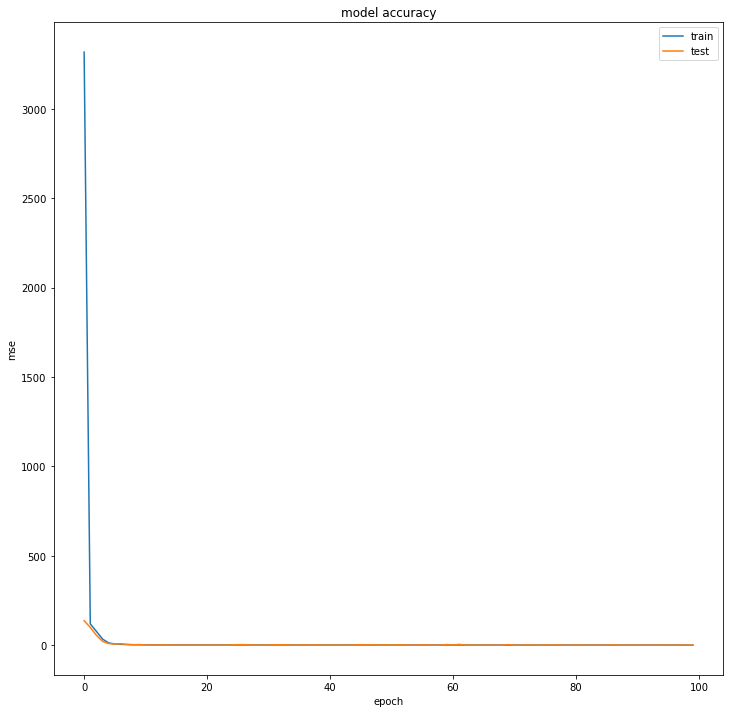

In [41]:
plt.figure(figsize = (12,12))
plt.plot(hist_2.history['mse'])
plt.plot(hist_2.history['val_mse'])
plt.title('model accuracy')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

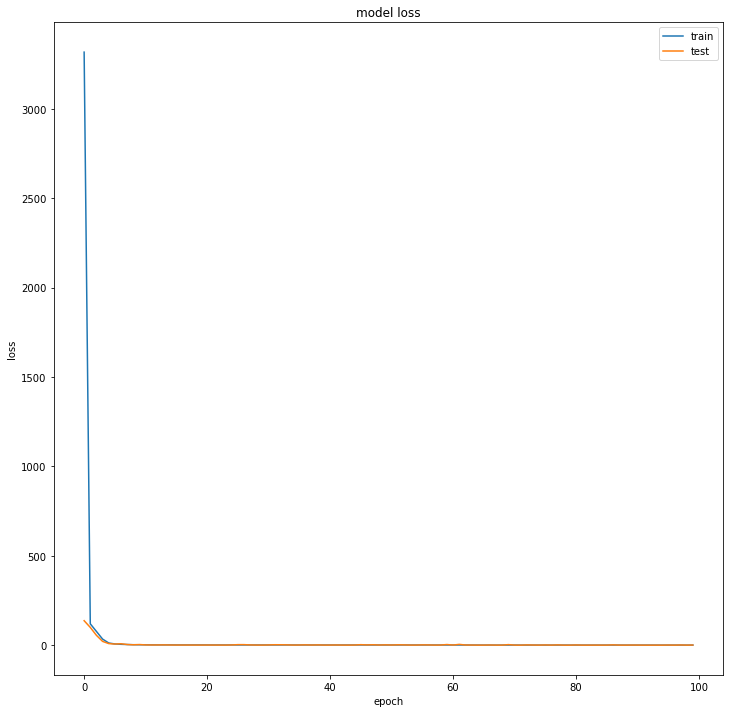

In [42]:
# summarize history for loss
plt.figure(figsize = (12,12))
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()